### Registration ID : GO_STP_9654

Prediction using Supervised Machine Learning using Simple Linear Regression

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# read dataset
df = pd.read_csv("StudentHoursScores.csv")
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    Hours  Scores
0     7.7      79
1     5.9      60
2     4.5      45
3     3.3      33
4     1.1      12
5     8.9      87
6     2.5      21
7     1.9      19
8     2.7      29
9     8.3      81
10    5.5      58
11    9.2      88
12    1.5      14
13    3.5      34
14    8.5      85
15    3.2      32
16    6.5      66
17    2.5      21
18    9.6      96
19    4.3      42
20    4.1      40
21    3.0      30
22    2.6      25


In [10]:
# Divide dataset into x(features as i/p) and y(label as o/p)
# Linear Regression model takes x as 2-D numpy array format bcz features(i/p) can be multiple values for particular dataset
#  and y as 1-D numpy array format bcz label(o/p) can be only one unique value

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

print(f"Dimesnsion of x is {x.ndim}\nDimesnsion of y is {y.ndim}")
print("Features(Hours) {}\n Label(Scores) {}".format(x,y))

Dimesnsion of x is 2
Dimesnsion of y is 1
Features(Hours) [[7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [2.7]
 [8.3]
 [5.5]
 [9.2]
 [1.5]
 [3.5]
 [8.5]
 [3.2]
 [6.5]
 [2.5]
 [9.6]
 [4.3]
 [4.1]
 [3. ]
 [2.6]]
 Label(Scores) [79 60 45 33 12 87 21 19 29 81 58 88 14 34 85 32 66 21 96 42 40 30 25]


In [12]:
# Divide dataset(x,y) into testing data as xtest,ytest and training data as xtrain,ytrain
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=1/3, random_state=1) # random_size: reproduce same dataset for training and testing after running algorithm everytime

In [16]:
# Creating simple linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # y=ax+b

Mymodel = model.fit(xtrain,ytrain)
Mymodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Prediction by our model
y_pred = Mymodel.predict(xtest)

In [20]:
# Difference of y_pred(predicted data by our model) and ytest(actual data in dataset)
print(f"Actual Data {ytest}\nPredicted Data {y_pred}")

Actual Data [40 21 33 34 42 66 58 12]
Predicted Data [40.50038393 24.63061172 32.56549782 34.54921935 42.48410545 64.30504223
 54.3864346  10.74456104]


In [22]:
df.tail()

,Hours,Scores
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [23]:
# predict scores for '4.3' hours
y_pred = Mymodel.predict([[4.3]])
y_pred

array([42.48410545])

In [26]:
# y = mx+c where c is intercept, m is coefficient, x is features(independent variable) and y is label(dependent variable)

In [27]:
m = Mymodel.coef_ # coefficient value calculated by our model 
m

array([9.91860763])

In [28]:
c = Mymodel.intercept_  # intercept value calculated by our model
c

-0.16590734578961275

In [ ]:
# To check above value is correct or incorrect we put this value in below equation for score(x)=4.3 which is calculated previously

In [29]:
x = 4.3
y = m*x+c
y

array([42.48410545])

In [30]:
y_pred = Mymodel.predict([[4.3]])
y_pred

array([42.48410545])

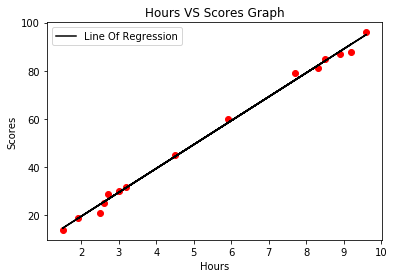

In [41]:
# visualize line by scatter plot
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain, Mymodel.predict(xtrain), color='black', label="Line Of Regression")
plt.title('Hours VS Scores Graph')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [38]:
# accuracy and mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

y_pred = Mymodel.predict(xtest)  # prdicted values
a = r2_score(ytest,y_pred)  # accuracy
msr = mean_squared_error(ytest,y_pred)  #  mean_squared_error

# The variance inflation factor (VIF) 
# VIF quantifies the extent of correlation between one predictor and the other predictors in a model.

vif = 1/1-(r2_score(ytest,y_pred))

In [40]:
print("y = mx + c")
print("coefficient(m):",m)
print("Intercept(c):",c)
print("Accuracy(a):",a)
print("Mean Squared Error(msr):",msr)
print("variance Inflation Factor(VIF):",vif)

y = mx + c
coefficient(m): [9.91860763]
Intercept(c): -0.16590734578961275
Accuracy(a): 0.9856694359125361
Mean Squared Error(msr): 3.9579226689064453
variance Inflation Factor(VIF): 0.014330564087463915
